<a href="https://colab.research.google.com/github/hws2002/Master-Python-with-Just-One-Book-ADP/blob/main/Chapter6/Chapter6_3_Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 릿지 규제

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

In [2]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [3]:
x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [4]:
x.isna().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [5]:
# 릿지 모델 생성
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3,1,5)

data = []
for i, a in enumerate(alpha):
  model = Ridge(alpha = a, random_state = 45)
  model.fit(x,y)
  data.append(pd.Series(np.hstack([model.coef_])))
df_ridge = pd.DataFrame(data, index = alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


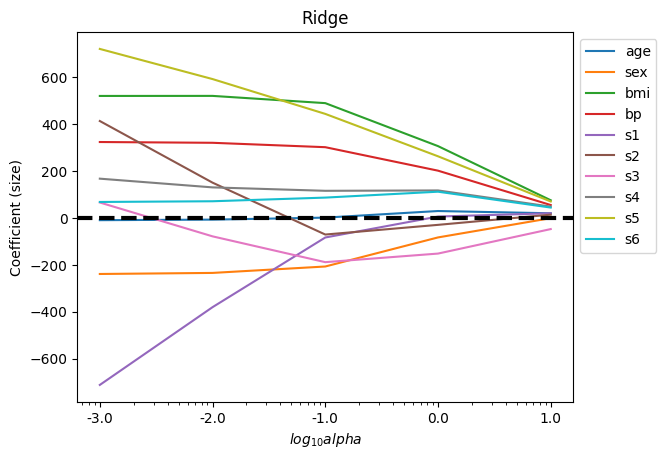

In [6]:
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ridge.columns, bbox_to_anchor = (1,1))
plt.title('Ridge')
plt.xlabel('$log_{10}alpha$')
plt.ylabel('Coefficient (size)')
plt.axhline(y=0, linestyle = '--', color = 'black', linewidth=3)

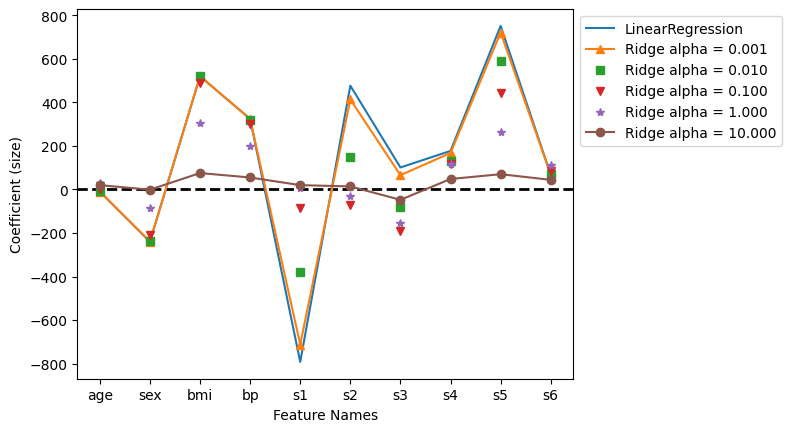

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

plt.axhline(y=0, linestyle = '--', color = 'black', linewidth = 2)
plt.plot(lr.coef_, label = 'LinearRegression')
plt.plot(df_ridge.loc[0.001], "^-", label = "Ridge alpha = 0.001")
plt.plot(df_ridge.loc[0.01], "s", label = "Ridge alpha = 0.010")
plt.plot(df_ridge.loc[0.1], "v", label = "Ridge alpha = 0.100")
plt.plot(df_ridge.loc[1], "*", label = "Ridge alpha = 1.000")
plt.plot(df_ridge.loc[10], "o-", label = "Ridge alpha = 10.000")

plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

# 2. 라쏘

In [8]:
from sklearn.linear_model import Lasso

alpha = np.logspace(-3,1,5)

data = []

for i, a in enumerate(alpha):
  lasso = Lasso(alpha = a, random_state = 45)
  lasso.fit(x,y)
  data.append(pd.Series(np.hstack([lasso.coef_])))
  # data.append(pd.Series(lasso.coef_))

df_lasso = pd.DataFrame(data, index = alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


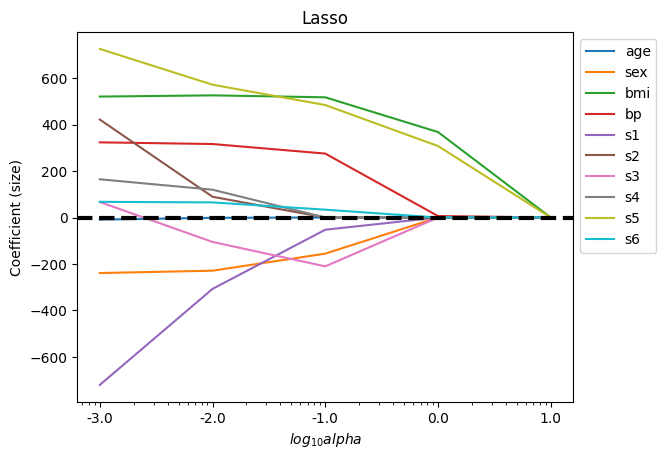

In [9]:

plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_lasso.columns, bbox_to_anchor = (1,1))
plt.title("Lasso")
plt.xlabel('$log_{10}alpha$')
plt.ylabel('Coefficient (size)')

plt.axhline( y = 0, linestyle = '--', color = 'black', linewidth = 3)
plt.show()

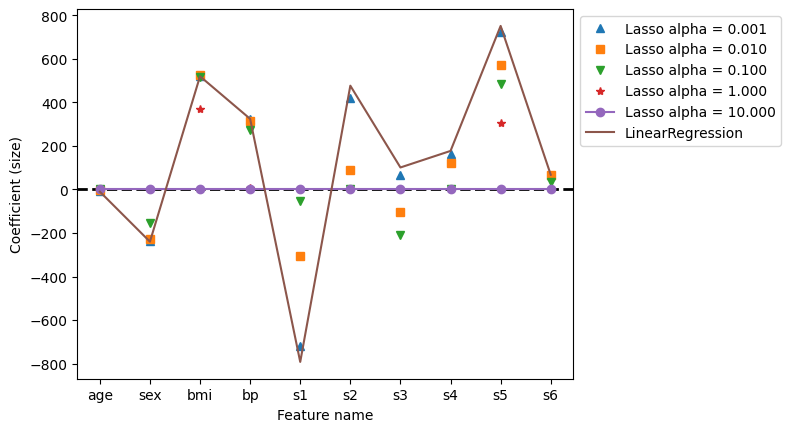

In [10]:
plt.axhline(y=0, linestyle = '--', color = 'black', linewidth = 2)

plt.plot(df_lasso.loc[0.001], '^', label = 'Lasso alpha = 0.001')
plt.plot(df_lasso.loc[0.010], 's', label = 'Lasso alpha = 0.010')
plt.plot(df_lasso.loc[0.100], 'v', label = 'Lasso alpha = 0.100')
plt.plot(df_lasso.loc[1.000], '*', label = 'Lasso alpha = 1.000')
plt.plot(df_lasso.loc[10.000], 'o-', label = 'Lasso alpha = 10.000')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature name')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# 3. 엘라스틱 넷 (Elastic Net)

In [42]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

alpha = np.logspace(-3,1,5)

data = []
for _, a in enumerate(alpha):
  elastic = ElasticNet(alpha = a, random_state = 45)
  elastic.fit(x,y)
  data.append(pd.Series(np.hstack([elastic.coef_])))

df_data = pd.DataFrame(data, index = alpha)
df_data.columns = x.columns
df_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,8.706329,-178.074465,450.884335,281.068431,-44.049705,-77.943898,-188.957481,119.794399,393.702359,98.944302
0.010,33.147367,-35.245354,211.024367,144.559236,21.931722,0.000000,-115.619973,100.658917,185.325911,96.257335
0.100,10.286332,0.285983,37.464655,27.544765,11.108856,8.355892,-24.120809,25.505492,35.465700,22.894985
1.000,0.359018,0.000000,3.259767,2.204340,0.528646,0.250935,-1.861363,2.114454,3.105835,1.769851
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


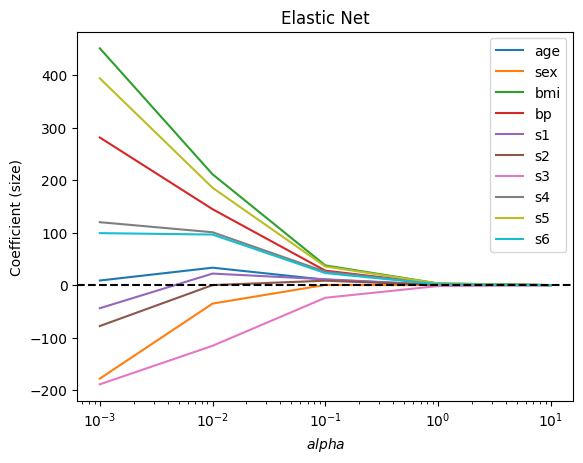

In [49]:
# 각 apha 값마다 coef의 값을 출력해보자


plt.semilogx(alpha, df_data)
plt.legend(labels = df_data.columns, bbox_to_anchor = (1,1))
plt.title("Elastic Net")
plt.xlabel('$alpha$')
plt.ylabel('Coefficient (size)')
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.show()

[]

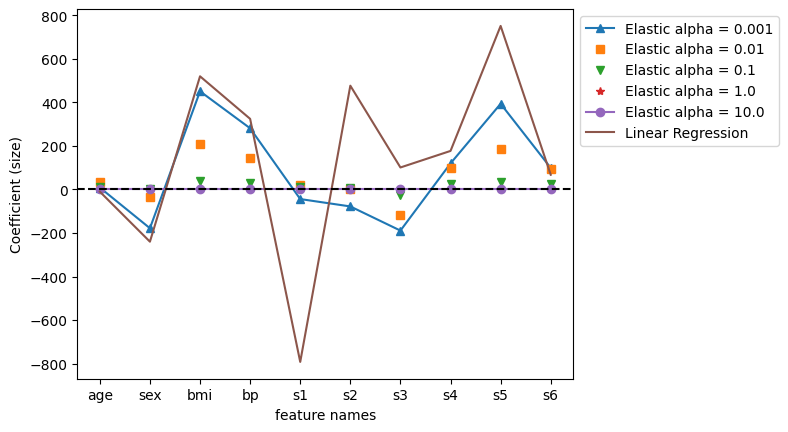

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)
linestyles = ['^-', 's','v','*','o-']
for i in range(len(alpha)):
  plt.plot(df_data.iloc[i], linestyles[i], label = f'Elastic alpha = {alpha[i]}')
plt.plot(lr.coef_, label = 'Linear Regression')
plt.legend(bbox_to_anchor = (1,1))
plt.axhline(y = 0, linestyle = '--', color = 'black')
plt.xlabel('feature names')
plt.ylabel('Coefficient (size)')
plt.plot()